###Importing Libs

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as datetime
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

### Reading Excel File

In [2]:
onlineRetail = pd.read_excel('/content/online_retail_II.xlsx', 
                             sheet_name = 'Year 2010-2011',
                             parse_dates = True)

In [3]:
onlineRetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
onlineRetail.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [5]:
onlineRetail['Country'].value_counts(normalize = True)

United Kingdom          0.914318
Germany                 0.017521
France                  0.015792
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [6]:
onlineRetail.dropna(inplace = True)

In [7]:
uk = onlineRetail[onlineRetail['Country'] == 'United Kingdom']
uk.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
uk = uk[uk.InvoiceDate <= '2011-12-02']

In [9]:
uk.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

#### Getting valid Customer Id's and conveting into int values

In [10]:
uk = uk[uk['Customer ID'].notna()] 

####Customers with canceled Orders that start with 'C' in the Invoice

In [11]:
uk[uk['Invoice'].str.contains('C', na = False) == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
517653,C580072,22942,CHRISTMAS LIGHTS 10 SANTAS,-1,2011-12-01 14:02:00,7.65,16240.0,United Kingdom
517898,C580099,23485,BOTANICAL GARDENS WALL CLOCK,-1,2011-12-01 15:06:00,20.80,13171.0,United Kingdom
518994,C580131,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-12-01 18:12:00,7.95,17576.0,United Kingdom
518995,C580131,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-18,2011-12-01 18:12:00,2.10,17576.0,United Kingdom


####Deleting customers with canceled Orders

In [12]:
uk = uk[uk['Invoice'].str.contains('C', na = False) != True]

#### Deleting Duplicates

In [13]:
print(uk.shape)
print(uk[uk.duplicated()].shape)

(340580, 8)
(4860, 8)


In [14]:
uk = uk.drop_duplicates(keep = 'first')
uk['CustomerId'] = uk['Customer ID'].astype(int)
uk.drop('Customer ID', axis = 1, inplace = True)
uk.reset_index()
uk.head()

<ipython-input-14-0e9c5506b462>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk['CustomerId'] = uk['Customer ID'].astype(int)
<ipython-input-14-0e9c5506b462>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk.drop('Customer ID', axis = 1, inplace = True)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,CustomerId
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,17850


### Feature Engineering

#### Getting the Total Price for an order

In [15]:
uk['TotalPrice'] = uk['Quantity'] * uk['Price']
uk.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,CustomerId,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,17850,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,17850,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,17850,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,17850,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,17850,20.34


#### Creating RFM Data Frame

In [16]:
uk.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Country                object
CustomerId              int64
TotalPrice            float64
dtype: object

#### Creating the Recency, Frequency and Monetary

In [17]:
 #dataframe generation adapted from https://www.kaggle.com/code/alpayabbaszade/rfm-k-means-manova#MANOVA
rfm = uk.groupby('CustomerId').agg({
                              'InvoiceDate': lambda InvoiceDate: (datetime.datetime(2011, 12, 2) - InvoiceDate.max()).days,
                              'Invoice': lambda Invoice: Invoice.nunique(),
                              'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerId,,,
12346,317,1,77183.60
12747,14,10,3757.51
12748,0,202,32188.62
12749,14,4,3327.82
12820,36,3,731.99


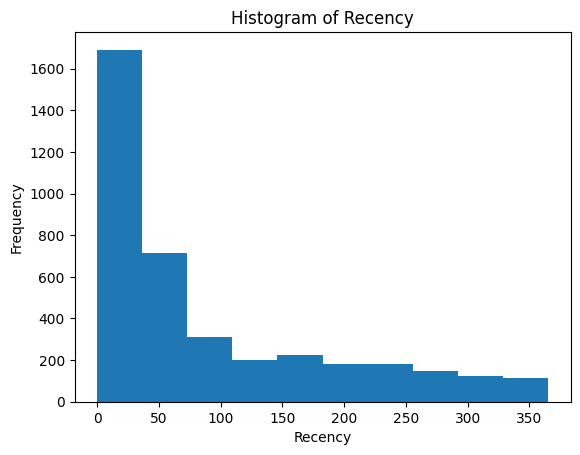

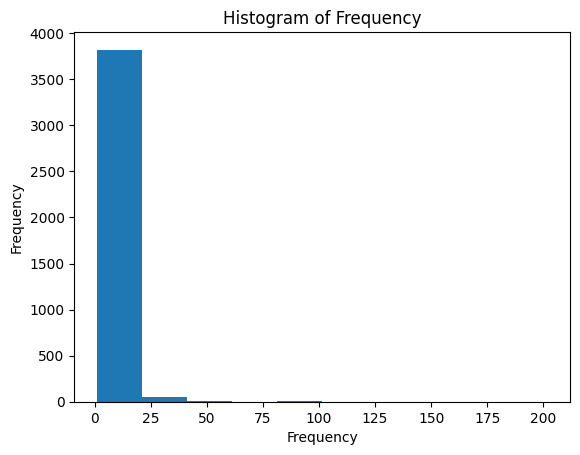

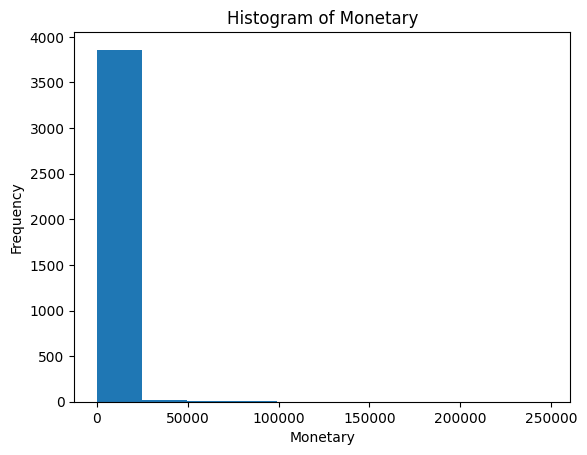

In [18]:
plt.hist(rfm['Recency'])
plt.title('Histogram of Recency')
plt.ylabel('Frequency')
plt.xlabel('Recency')
plt.show()

plt.hist(rfm['Frequency'])
plt.title('Histogram of Frequency')
plt.ylabel('Frequency')
plt.xlabel('Frequency')
plt.show()

plt.hist(rfm['Monetary'])
plt.title('Histogram of Monetary')
plt.ylabel('Frequency')
plt.xlabel('Monetary')
plt.show()

### Kmeans clustering 

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

#### Log Transformation data and added 1 to avoid log(0) exception

In [20]:
rfm['Recency'] = np.log(rfm.Recency + 1)
rfm['Frequency'] = np.log(rfm.Frequency + 1)
rfm['Monetary'] = np.log(rfm.Monetary + 1)
rfm.head()

,Recency,Frequency,Monetary
CustomerId,,,
12346,5.762051,0.693147,11.253955
12747,2.708050,2.397895,8.231778
12748,0.000000,5.313206,10.379399
12749,2.708050,1.609438,8.110373
12820,3.610918,1.386294,6.597132


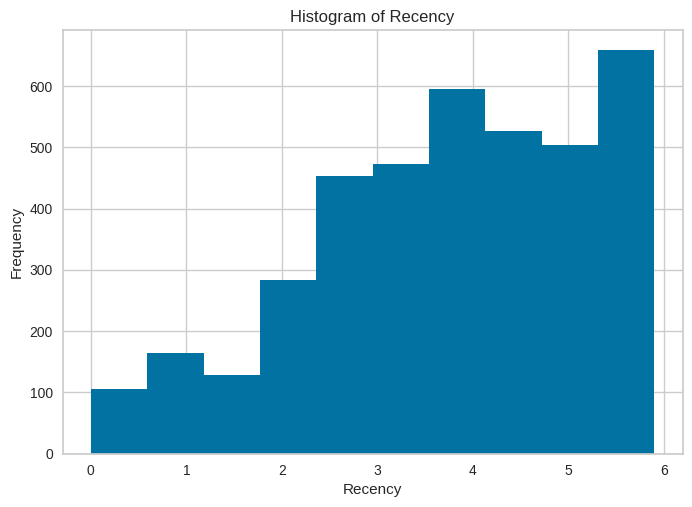

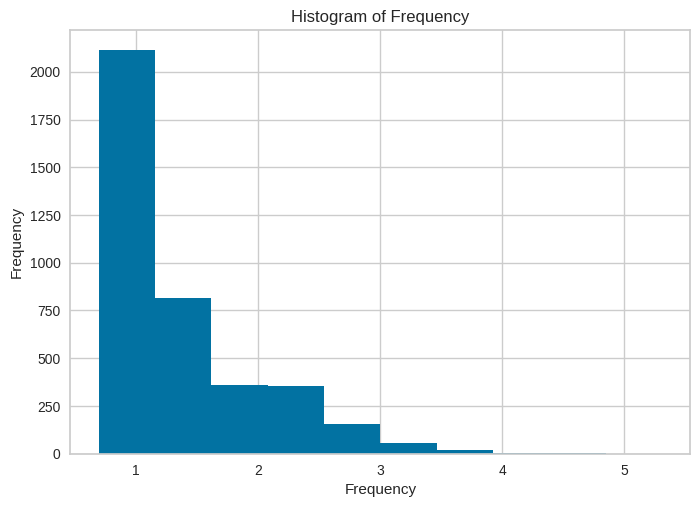

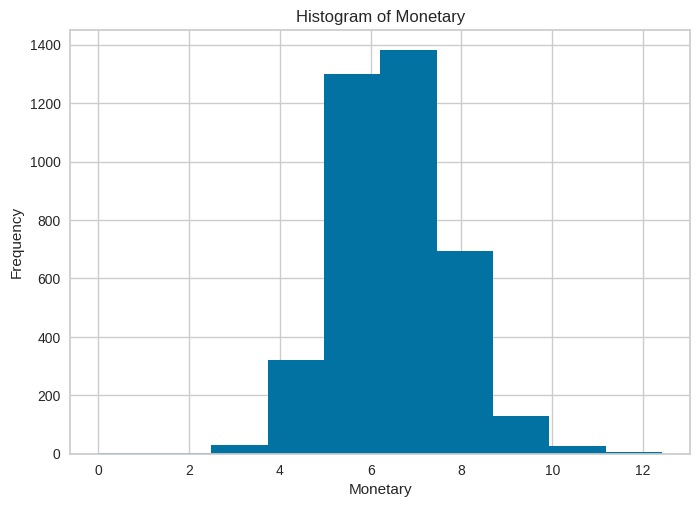

In [21]:
plt.hist(rfm['Recency'])
plt.title('Histogram of Recency')
plt.ylabel('Frequency')
plt.xlabel('Recency')
plt.show()

plt.hist(rfm['Frequency'])
plt.title('Histogram of Frequency')
plt.ylabel('Frequency')
plt.xlabel('Frequency')
plt.show()

plt.hist(rfm['Monetary'])
plt.title('Histogram of Monetary')
plt.ylabel('Frequency')
plt.xlabel('Monetary')
plt.show()

#### Hyperparameter tuning for Kmeans

In [22]:
for n_clusters in range(2, 20):
    clusterer = KMeans(n_clusters = n_clusters, 
                       n_init = 15,
                       random_state = 5831)
    preds = clusterer.fit_predict(rfm)
    centers = clusterer.cluster_centers_

    score = silhouette_score(rfm, preds)
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4165837189483552
For n_clusters = 3, silhouette score is 0.33231300818134246
For n_clusters = 4, silhouette score is 0.353073448779945
For n_clusters = 5, silhouette score is 0.32668133662789905
For n_clusters = 6, silhouette score is 0.3279958938750741
For n_clusters = 7, silhouette score is 0.32278784366342145
For n_clusters = 8, silhouette score is 0.3067686762553766
For n_clusters = 9, silhouette score is 0.315229451303697
For n_clusters = 10, silhouette score is 0.31136809325383064
For n_clusters = 11, silhouette score is 0.30986347642082096
For n_clusters = 12, silhouette score is 0.3040973433559882
For n_clusters = 13, silhouette score is 0.3009878565243627
For n_clusters = 14, silhouette score is 0.2939271871433568
For n_clusters = 15, silhouette score is 0.2889434847375893
For n_clusters = 16, silhouette score is 0.2862186253516601
For n_clusters = 17, silhouette score is 0.2865871473060267
For n_clusters = 18, silhouette score is 0.28

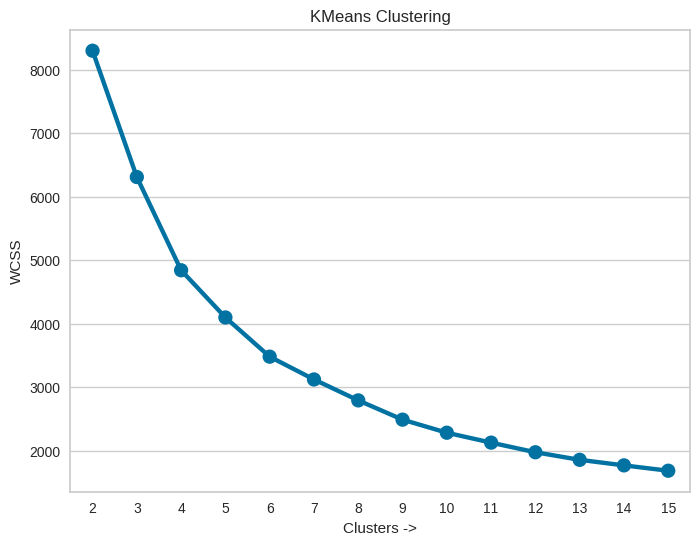

In [23]:
wcss = []
for k in range(1, 15):
  kmeans = KMeans(n_clusters = k + 1, 
                  init = 'k-means++', 
                  n_init = 10,
                  random_state = 5831).fit(rfm)
  wcss.append(kmeans.inertia_)

plt.figure(figsize = (8,6))
ax = sns.pointplot(x = list(range(2, 16)), y = wcss)
ax.set_title('KMeans Clustering')
ax.set_xlabel('Clusters ->')
ax.set_ylabel('WCSS')
plt.show();

##### K Selection
Silhouette score suggests to use 4 clusters but elbow methord suggenst 5 or 6 upon close inspection of silhouette scores the data seems to over fit after 6, so we have K = 6 as number of clusters

#### Kmeans model

In [24]:
kmeans = KMeans(n_clusters = 6, 
                init = 'k-means++',
                max_iter = 300, 
                n_init = 10, 
                random_state = 5381).fit(rfm)
clusters = kmeans.labels_
segments = pd.DataFrame({'Customer': rfm.index, 'Cluster': clusters})
rfm['clusterNo'] = clusters
rfm['clusterNo'] = rfm['clusterNo'] + 1

In [25]:
rfm.head()

,Recency,Frequency,Monetary,clusterNo
CustomerId,,,,
12346,5.762051,0.693147,11.253955,6
12747,2.708050,2.397895,8.231778,6
12748,0.000000,5.313206,10.379399,2
12749,2.708050,1.609438,8.110373,6
12820,3.610918,1.386294,6.597132,1


In [26]:
rfm['clusterNo'].value_counts().sort_values(ascending = True)

2    279
3    390
6    764
1    781
5    799
4    877
Name: clusterNo, dtype: int64

##### Clusters

###### 2D Scatter Plots


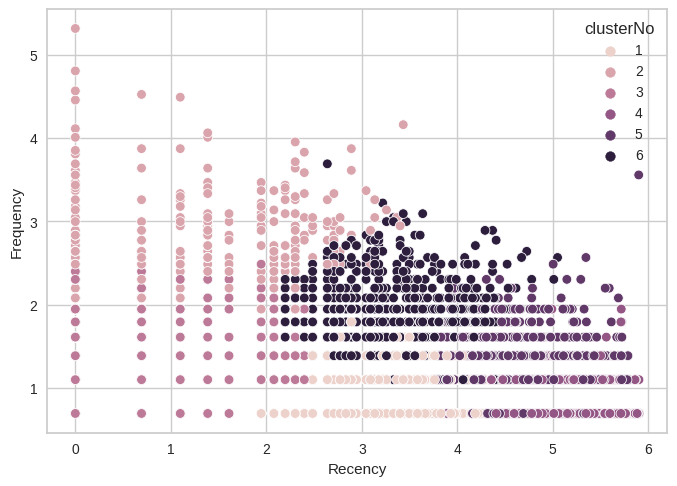

In [27]:
sns.scatterplot(x = 'Recency', y = 'Frequency', hue = 'clusterNo', data = rfm);

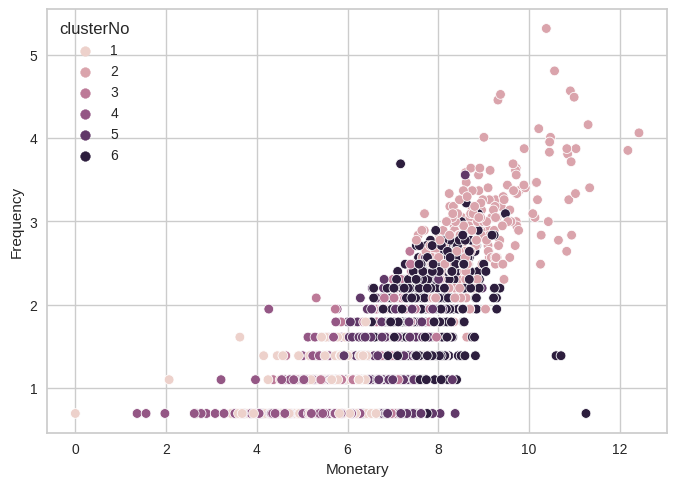

In [28]:
sns.scatterplot(x = 'Monetary', y = 'Frequency', hue = 'clusterNo', data = rfm);

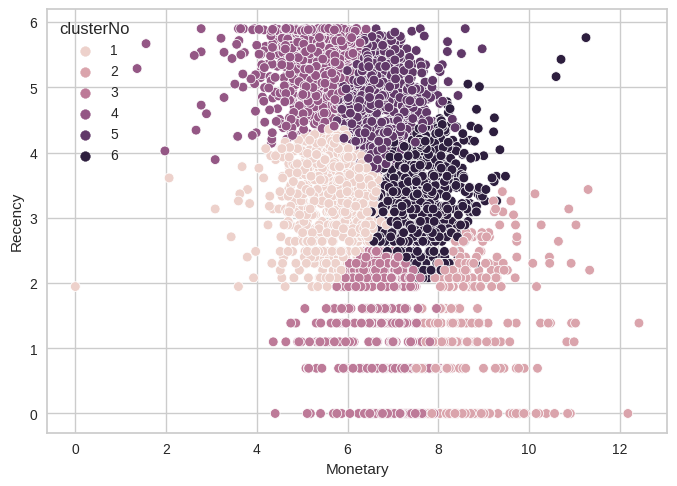

In [29]:
sns.scatterplot(x = 'Monetary', y = 'Recency', hue = 'clusterNo', data = rfm);

###### 3D Scatter Plot

In [30]:
# https://plotly.com/python/3d-scatter-plots/#3d-scatter-plot-with-plotly-express
import plotly.express as px
fig = px.scatter_3d(rfm, 
                    x = 'Recency', 
                    y = 'Frequency', 
                    z = 'Monetary',
                    hover_name = rfm.index, 
                    opacity = 1, 
                    size = 'clusterNo',
                    color = 'clusterNo')
fig.show()

######Box Plots

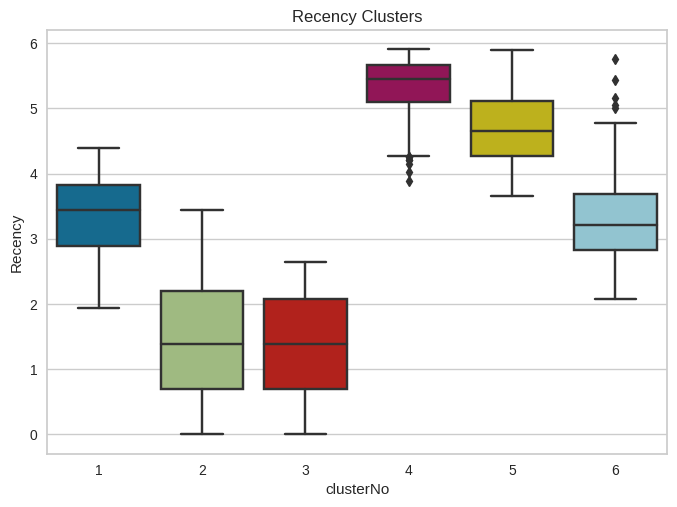

In [31]:
sns.boxplot(x = 'clusterNo', y='Recency', data=rfm).set(title='Recency Clusters');

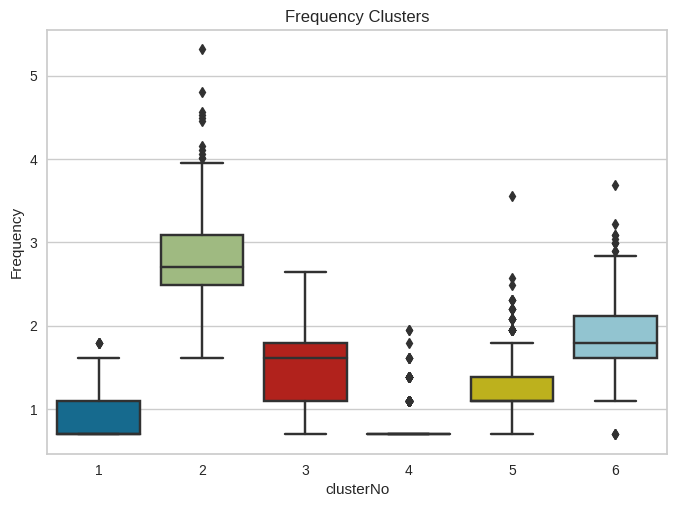

In [32]:
sns.boxplot(x = 'clusterNo', y = 'Frequency', data = rfm).set(title='Frequency Clusters');

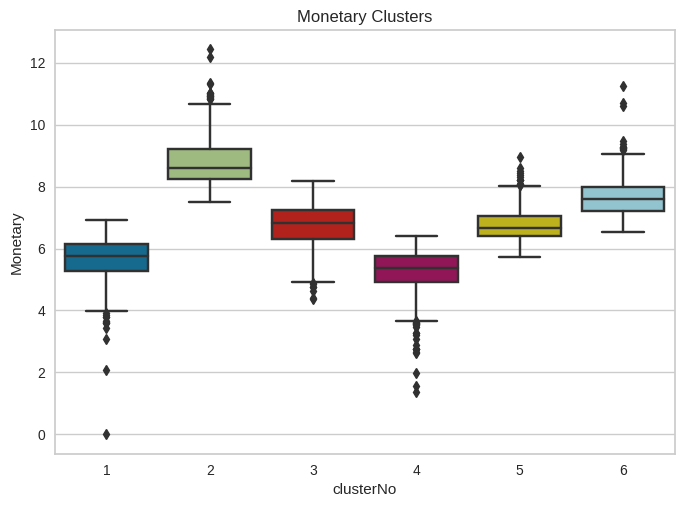

In [33]:
sns.boxplot(x = 'clusterNo', y='Monetary', data=rfm).set(title='Monetary Clusters');

### Agglomerative Clustering

#### Hyperparameter tuning for Agglomerative Clustering

In [34]:
for i in range(2, 15):
  a = AgglomerativeClustering(n_clusters = i, 
                                linkage='complete',
                                compute_distances = True).fit(rfm)
  preds = a.fit_predict(rfm)
  score = silhouette_score(rfm, preds)
  print(f'Silhouette Score of Alggo cluster {i} is: {score:.4f}')

Silhouette Score of Alggo cluster 2 is: 0.3273
Silhouette Score of Alggo cluster 3 is: 0.3588
Silhouette Score of Alggo cluster 4 is: 0.4512
Silhouette Score of Alggo cluster 5 is: 0.4112
Silhouette Score of Alggo cluster 6 is: 0.3675
Silhouette Score of Alggo cluster 7 is: 0.4453
Silhouette Score of Alggo cluster 8 is: 0.4345
Silhouette Score of Alggo cluster 9 is: 0.4089
Silhouette Score of Alggo cluster 10 is: 0.4668
Silhouette Score of Alggo cluster 11 is: 0.4638
Silhouette Score of Alggo cluster 12 is: 0.4519
Silhouette Score of Alggo cluster 13 is: 0.4415
Silhouette Score of Alggo cluster 14 is: 0.4295


* n_clusters = 7 is chosen because of the max Silhouette Score

In [35]:
agglo = AgglomerativeClustering(n_clusters = 7, 
                                linkage='complete',
                                compute_distances = True).fit(rfm)

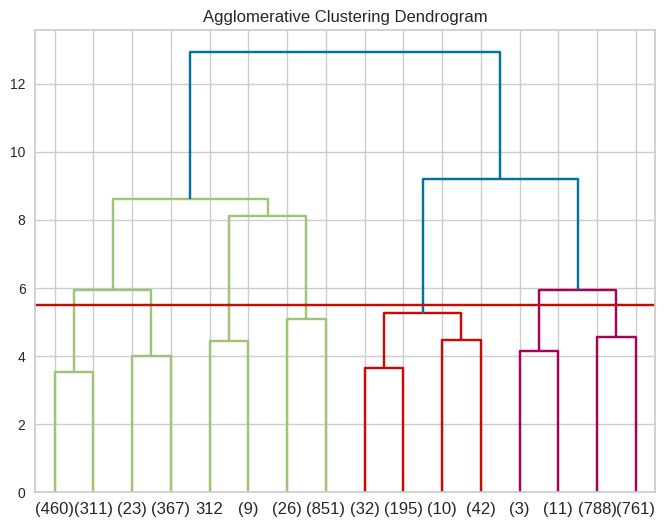

In [36]:
# plot_dendrogram is adapted form https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(agglo, **kwargs):    
    counts = np.zeros(agglo.children_.shape[0])
    n_samples = len(agglo.labels_)
    for i, merge in enumerate(agglo.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([agglo.children_, agglo.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(8, 6))
plt.title('Agglomerative Clustering Dendrogram')
plot_dendrogram(agglo, truncate_mode = 'level', p=3)
plt.axhline(y = 5.5, color = 'r', linestyle = '-')
plt.show()

###DBSCAN


In [55]:
rfm1 = rfm.reset_index()
CustomerId = rfm1['CustomerId']
rfm1.drop('CustomerId', axis = 1, inplace = True)

In [56]:
rfm1.head()

,Recency,Frequency,Monetary,clusterNo
0,5.762051,0.693147,11.253955,6
1,2.708050,2.397895,8.231778,6
2,0.000000,5.313206,10.379399,2
3,2.708050,1.609438,8.110373,6
4,3.610918,1.386294,6.597132,1


#### Hyperparameter tuning for DBScan Clustering

In [57]:
for i in range(1, 20):
  db = DBSCAN(eps = i/10, min_samples = 6)
  preds = db.fit_predict(rfm1)
  score = silhouette_score(rfm, preds)
  print(f'Silhouette Score of eps: {i/10} cluster: {score:.4f}')

Silhouette Score of eps: 0.1 cluster: -0.5002
Silhouette Score of eps: 0.2 cluster: -0.2334
Silhouette Score of eps: 0.3 cluster: 0.1665
Silhouette Score of eps: 0.4 cluster: 0.1964
Silhouette Score of eps: 0.5 cluster: 0.4748
Silhouette Score of eps: 0.6 cluster: 0.4825
Silhouette Score of eps: 0.7 cluster: 0.5050
Silhouette Score of eps: 0.8 cluster: 0.5071
Silhouette Score of eps: 0.9 cluster: 0.5088
Silhouette Score of eps: 1.0 cluster: 0.5092
Silhouette Score of eps: 1.1 cluster: 0.4891
Silhouette Score of eps: 1.2 cluster: 0.4897
Silhouette Score of eps: 1.3 cluster: 0.4893
Silhouette Score of eps: 1.4 cluster: 0.4894
Silhouette Score of eps: 1.5 cluster: 0.4899
Silhouette Score of eps: 1.6 cluster: 0.4898
Silhouette Score of eps: 1.7 cluster: 0.4898
Silhouette Score of eps: 1.8 cluster: 0.4900
Silhouette Score of eps: 1.9 cluster: 0.4894


In [58]:
db = DBSCAN(eps = 1.0, min_samples = 6).fit(rfm1)
labels3D = db.labels_

clusters = labels3D 
rfm1['clusterNo'] = clusters
rfm1.head()

,Recency,Frequency,Monetary,clusterNo
0,5.762051,0.693147,11.253955,-1
1,2.708050,2.397895,8.231778,0
2,0.000000,5.313206,10.379399,-1
3,2.708050,1.609438,8.110373,0
4,3.610918,1.386294,6.597132,1


* ClusterNo = -1 is an outlier that represents  Noise in the DBSCAN Algorithm

In [59]:
cid = pd.Series(CustomerId).to_frame()
rfm1 = pd.concat([rfm1, cid], axis=1, join="inner")
rfm1

,Recency,Frequency,Monetary,clusterNo,CustomerId
0,5.762051,0.693147,11.253955,-1,12346
1,2.708050,2.397895,8.231778,0,12747
2,0.000000,5.313206,10.379399,-1,12748
3,2.708050,1.609438,8.110373,0,12749
4,3.610918,1.386294,6.597132,1,12820
...,...,...,...,...,...
3885,5.598422,0.693147,5.201806,2,18280
3886,5.153292,0.693147,4.404522,2,18281
3887,4.779123,0.693147,4.617198,2,18282
3888,0.693147,2.772589,7.516722,4,18283


##### Clusters

###### 2D Scatter Plots

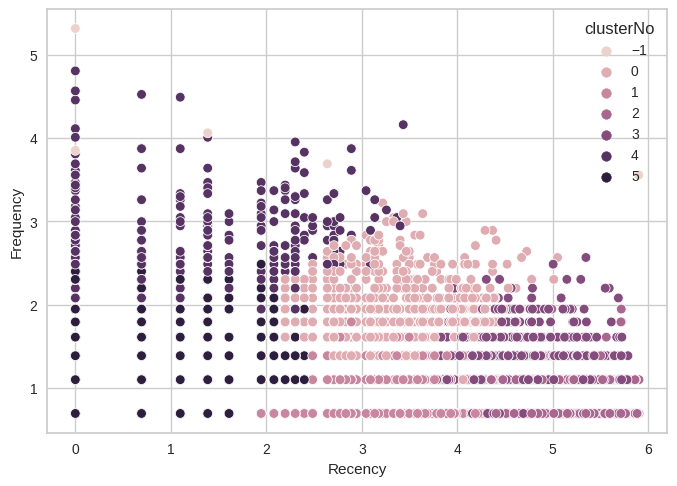

In [60]:
sns.scatterplot(x = 'Recency', y = 'Frequency', hue = 'clusterNo', data = rfm1);

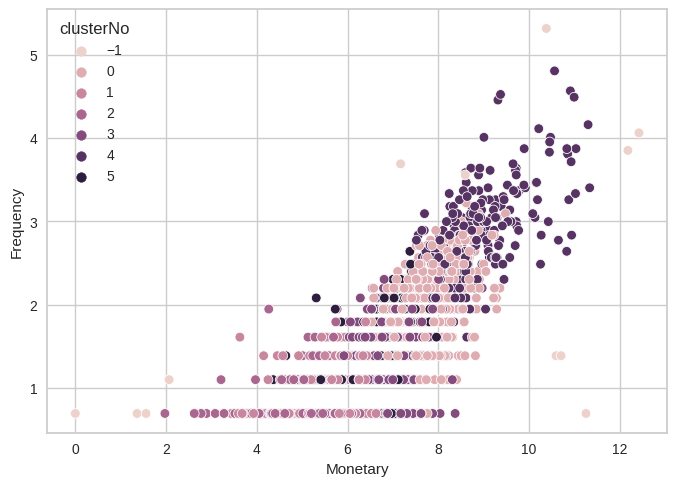

In [61]:
sns.scatterplot(x = 'Monetary', y = 'Frequency', hue = 'clusterNo', data = rfm1);

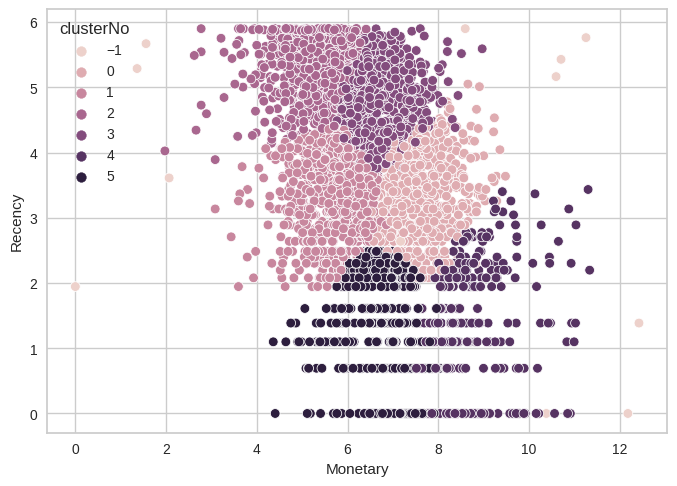

In [62]:
sns.scatterplot(x = 'Monetary', y = 'Recency', hue = 'clusterNo', data = rfm1);

######3D Scatter Plots

In [63]:
rfm1_ = rfm1[rfm1['clusterNo'] != -1].reset_index()

In [64]:
# https://plotly.com/python/3d-scatter-plots/#3d-scatter-plot-with-plotly-express
import plotly.express as px
fig = px.scatter_3d(rfm1_, 
                    x = 'Recency', 
                    y = 'Frequency', 
                    z = 'Monetary',
                    opacity = 1, 
                    size = 'clusterNo',
                    color = 'clusterNo')
fig.show()

######Box Plots

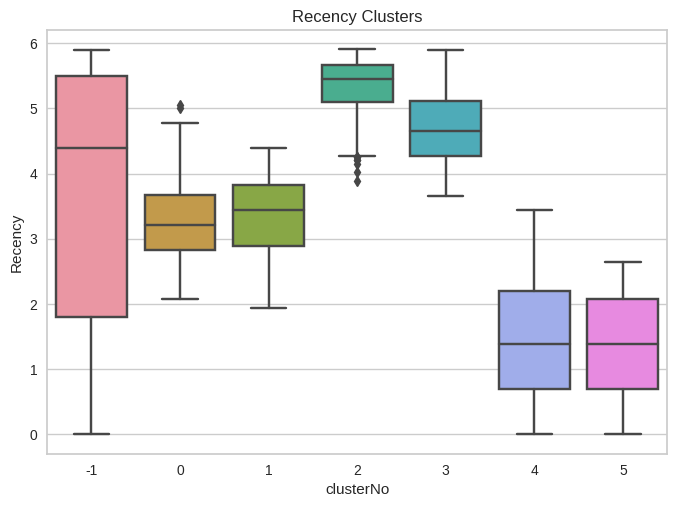

In [65]:
sns.boxplot(x = 'clusterNo', y='Recency', data = rfm1).set(title='Recency Clusters');

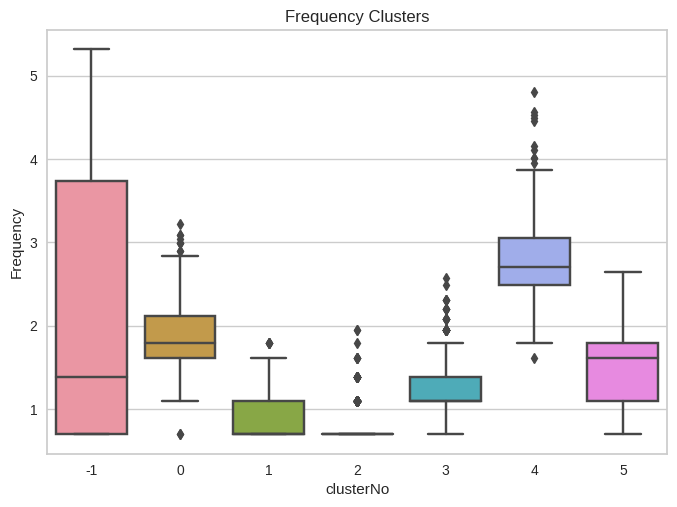

In [66]:
sns.boxplot(x = 'clusterNo', y = 'Frequency', data = rfm1).set(title='Frequency Clusters');

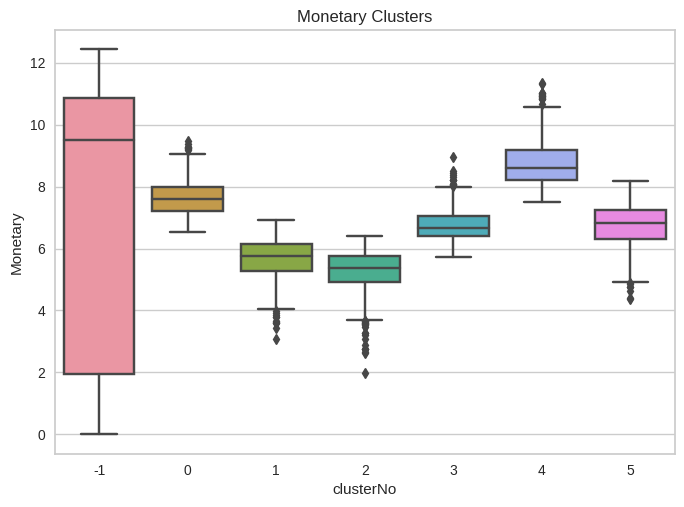

In [67]:
sns.boxplot(x = 'clusterNo', y='Monetary', data = rfm1).set(title='Monetary Clusters');

## Metrics

#### Silhoutte Scores


In [68]:
print(f'silhouette_score of Kmeans = {silhouette_score(rfm, kmeans.labels_)}')
print(f'silhouette_score of Agglomerative = {silhouette_score(rfm, agglo.labels_)}')
print(f'silhouette_score of DBSCAN = {silhouette_score(rfm, db.labels_)}')

silhouette_score of Kmeans = 0.5092534087271142
silhouette_score of Agglomerative = 0.44525926001955557
silhouette_score of DBSCAN = 0.5091881418096829


### Calinski Harabasz Score

In [70]:
print(f'calinski_harabasz_score of Kmeans = {calinski_harabasz_score(rfm, kmeans.labels_)}')
print(f'calinski_harabasz_score of Agglomerative = {calinski_harabasz_score(rfm, agglo.labels_)}')
print(f'calinski_harabasz_score of DBSCAN = {calinski_harabasz_score(rfm, db.labels_)}')

calinski_harabasz_score of Kmeans = 5503.436699637655
calinski_harabasz_score of Agglomerative = 3011.4438940798786
calinski_harabasz_score of DBSCAN = 4294.764097104413


### Davies Bouldin Index

In [71]:
print(f'davies_bouldin_score of Kmeans = {davies_bouldin_score(rfm, kmeans.labels_)}')
print(f'davies_bouldin_score of Agglomerative = {davies_bouldin_score(rfm, agglo.labels_)}')
print(f'davies_bouldin_score of DBSCAN = {davies_bouldin_score(rfm, db.labels_)}')

davies_bouldin_score of Kmeans = 0.7797210787482621
davies_bouldin_score of Agglomerative = 0.8701942397115616
davies_bouldin_score of DBSCAN = 2.465428732736903


### Kmeans vs Alggo vs DBSCAN cluster sizes

In [53]:
labels_kmeans = list(kmeans.labels_)
labels_agglo = list(agglo.labels_)
labels_dbscan = list(db.labels_)

# printing the size of the kmeans clusters
for i in np.unique(labels_kmeans):
  print(f'Cluster {i} - KMeans clusters: ', labels_kmeans.count(i))

print()

# printing the size of the agglomerative clusters
for i in np.unique(labels_agglo):
  print(f'Cluster {i} - Agglomerative clusters: ', labels_agglo.count(i))

print()

# printing the size of the DBSCAN clusters
for i in  np.unique(labels_dbscan):
  print(f'Cluster {i} - DBSCAN clusters: ', labels_dbscan.count(i))

Cluster 0 - KMeans clusters:  781
Cluster 1 - KMeans clusters:  279
Cluster 2 - KMeans clusters:  390
Cluster 3 - KMeans clusters:  877
Cluster 4 - KMeans clusters:  799
Cluster 5 - KMeans clusters:  764

Cluster 0 - Agglomerative clusters:  279
Cluster 1 - Agglomerative clusters:  877
Cluster 2 - Agglomerative clusters:  14
Cluster 3 - Agglomerative clusters:  1549
Cluster 4 - Agglomerative clusters:  10
Cluster 5 - Agglomerative clusters:  390
Cluster 6 - Agglomerative clusters:  771

Cluster -1 - DBSCAN clusters:  11
Cluster 0 - DBSCAN clusters:  2434
Cluster 1 - DBSCAN clusters:  779
Cluster 2 - DBSCAN clusters:  666
